<a href="https://colab.research.google.com/github/nspeer12/AI_CAP4630/blob/master/hw2/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import tensorflow as tf
%tensorflow_version 2.x

TensorFlow is already loaded. Please restart the runtime to change versions.


# Problem 1

define three surfaces and mark the critical points on each one

In [0]:
# surface functions

def upward_paraboloid(x, y):
  return (10 * x**2) + (10 * y**2)

def downward_paraboloid(x, y):
  return (-10 * x**2) + (-10 * y**2)

def hyperbolic_paraboloid(x, y):
    return (10 * x**2) - (10 * y**2)

In [0]:
X = [np.linspace(-6, 6, 100),np.linspace(-6, 6, 100)] 
X[0], X[1] = np.meshgrid(X[0], X[1])
y1 = upward_paraboloid(X[0], X[1])
y2 = downward_paraboloid(X[0],X[1])
y3 = hyperbolic_paraboloid(X[0],X[1])

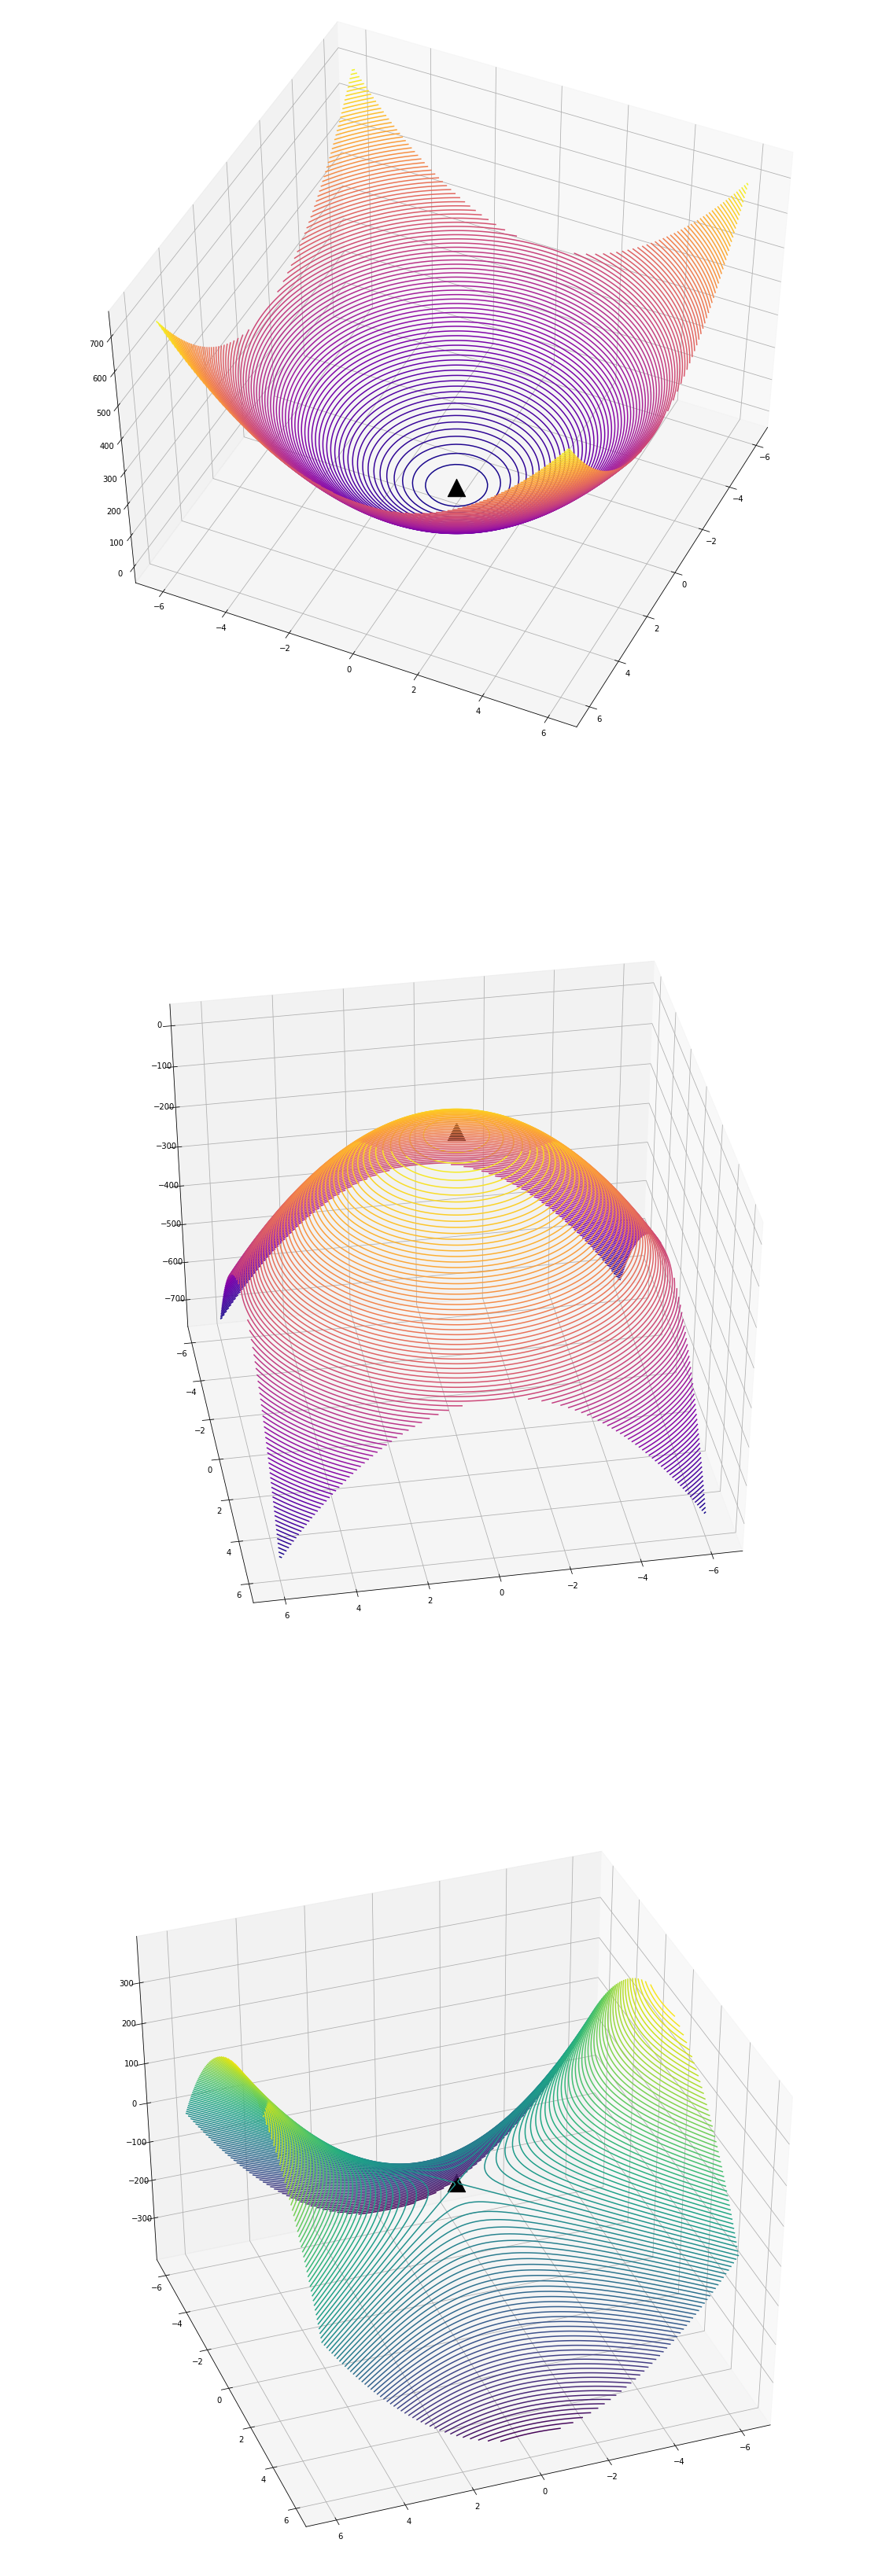

In [13]:
fig, axs = plt.subplots(3, subplot_kw=dict(projection='3d'), figsize=(20,60))

axs[0].scatter(0,0,0, s=500, c='black', marker='^')
axs[0].contour3D(X[0], X[1], y1, 100, cmap='plasma')
axs[0].view_init(50, 25)
 
axs[1].contour3D(X[0], X[1], y2, 100, cmap='plasma')
axs[1].scatter(0,0,0, s=500, c='black', marker='^')
axs[1].view_init(40, 80)

axs[2].contour3D(X[0], X[1], y3, 100, cmap='viridis')
axs[2].scatter(0,0,0, s=500, c='black', marker='^')
axs[2].view_init(40,70)

plt.show()

# will need to scroll through cell output to see each subgraph

# Problem 2
Multi-dimensional gradient descent implemented in NumPy

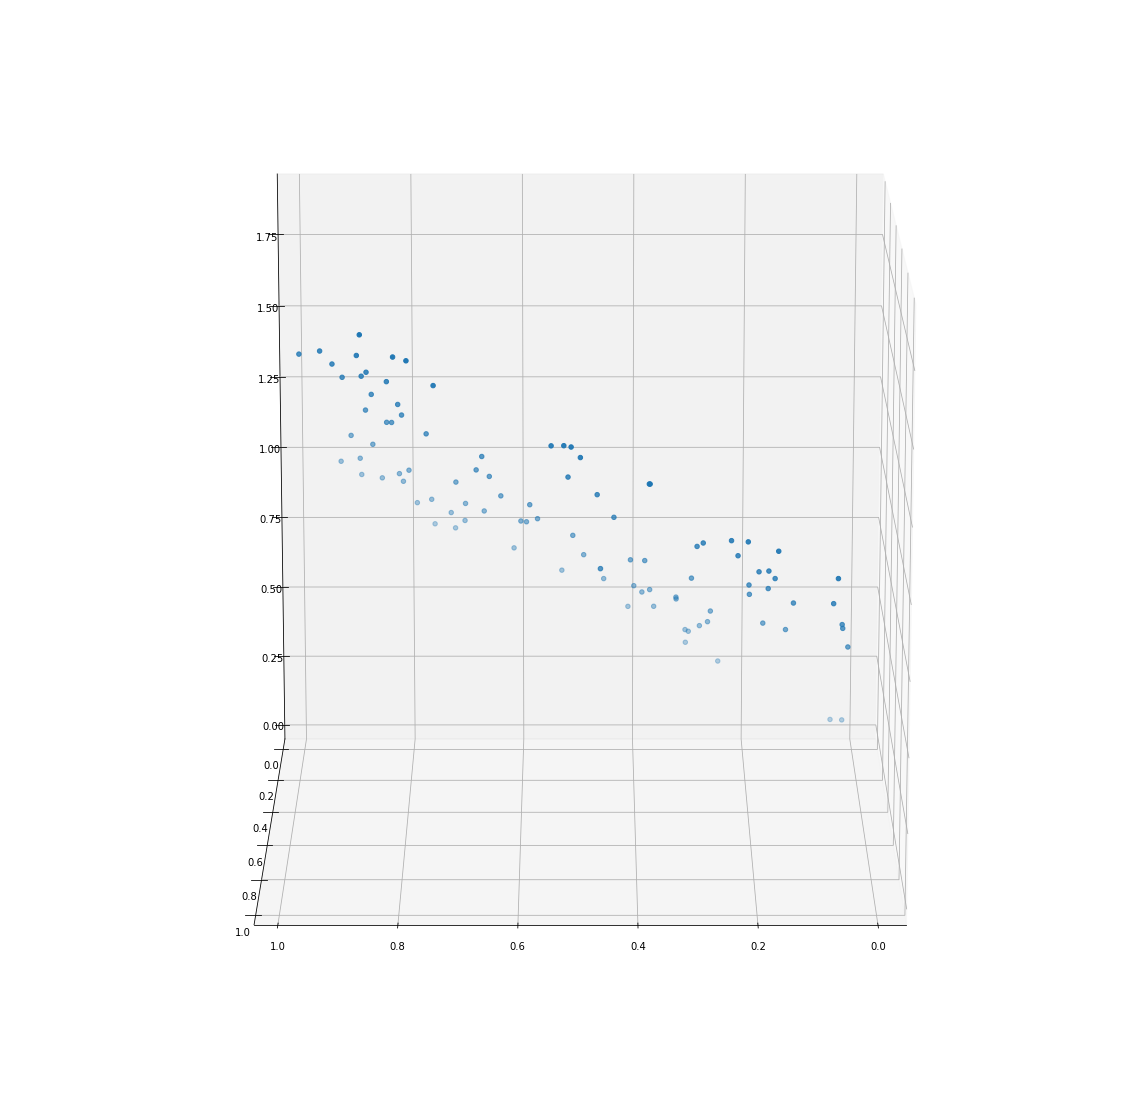

In [19]:
m = 100
np.random.seed(21)
X = np.array([np.random.rand(m, 1), np.random.rand(m, 1)])

#X_graph[0], X_graph[1] = np.meshgrid(X1, X2)

# semi random points that can be regressed nicely
Y = np.add(X[0], X[1])

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[0], X[1], Y, cmap='plasma')
ax.view_init(15,90)

train_x = [X[0][:80], X[1][:80]]
test_x = [X[0][80:], X[1][80:]]

# just test y1 for now
train_y = Y[:80]
test_y = Y[80:]

# combine bias w0 and weights w1 and w2
X_b = np.column_stack([X[0], X[1]])
# create array with x1=0 and x1=2
X_new = np.array([[0], [2]])
# add x0 = 1 to each instance
X_new_b = np.column_stack([np.ones((2, 1)), X_new])


(2, 1)
(100, 1)
(100, 1)
(2, 1)


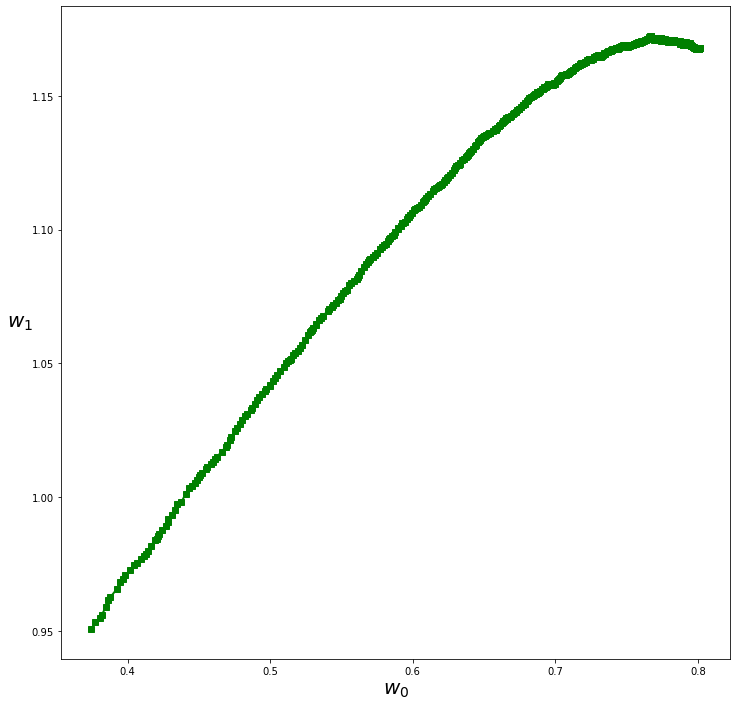

In [20]:
# number of epochs
epochs = 20
lr = 0.01
np.random.seed(42) # the answer to life
initial_weight = np.random.rand(2,1)

# check dimensions
print(initial_weight.shape)
print(Y.shape)
print(X_b.dot(initial_weight).shape)
print(X_b.T.dot(X_b.dot(initial_weight)).shape)

weight = initial_weight
weight_path_mgd = []
batch_size = 4

# training
weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = Y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)

weight_path_mgd = np.array(weight_path_mgd)
plt.figure(figsize=(12,12))
plt.plot(weight_path_mgd[:, 0], weight_path_mgd[:, 1], "g-s", linewidth=2, label="mini-batch")
plt.xlabel(r"$w_0$", fontsize=20)
plt.ylabel(r"$w_1$   ", fontsize=20, rotation=0)
plt.show()


# Problem 3
Load the mnist dataset. Average out each digit and display what the average looks like

In [0]:
# Load data

# the built in function automatically loads this with a test train split,
# I will just use the training data for averaging 
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [0]:
# array to store all 10 of the 28x28 results
digits = np.zeros((10,28,28))

# frequency of each digit, used for averaging
freq = np.zeros(10)

# loop through training data and add it to its respective result array
for i in range(0, len(y_train)):
    freq[y_train[i]] += 1
    digits[y_train[i]] += (x_train[i])

# average out each matrix
for i in range(0,10):
    digits[i] /= freq[i]

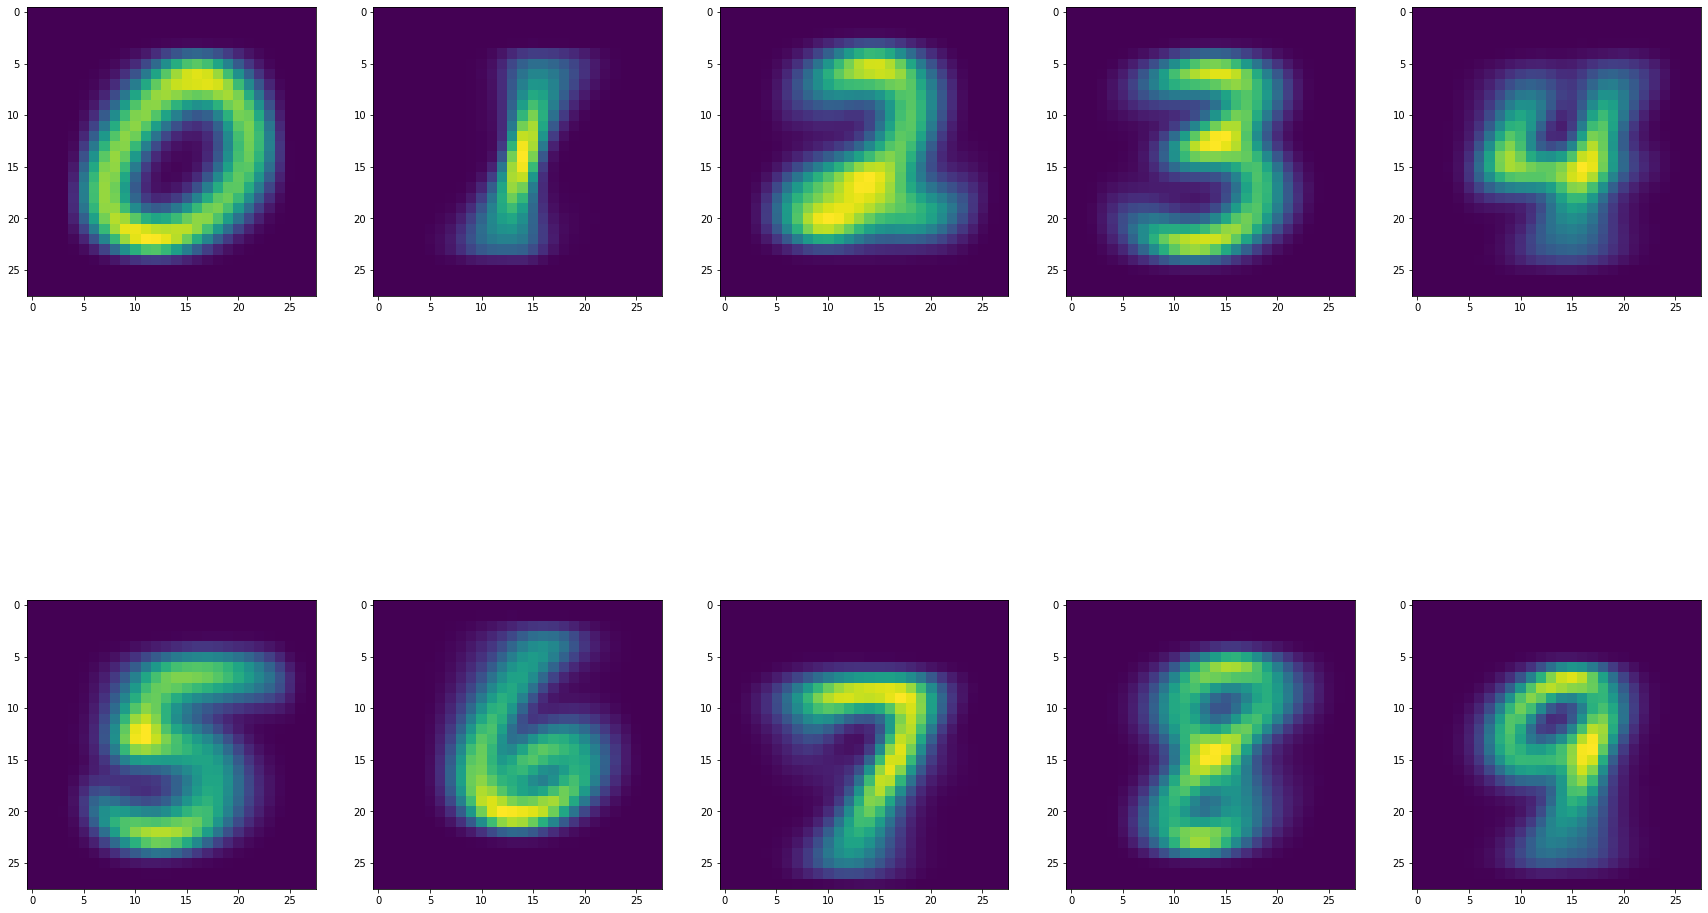

In [23]:
# plot results

fig, axs = plt.subplots(2,5, figsize=(30, 20))
axs = axs.ravel()

for i in range(10):
    axs[i].imshow(digits[i])